In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [73]:
df = pd.read_csv('climate_action_data.csv')

#identifying the structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [74]:
#identifying the data types of each data
print(df.dtypes)

Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object


In [75]:
#idenfying missing values
print("missing values in each column")
df.isnull().sum()

missing values in each column


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [76]:
#Handling missing values
# Define numeric columns
numeric_cols = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

# Convert numeric columns to float and handle missing values
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to numeric, coerce errors to NaN
        df[col] = df[col].fillna(df[col].median())         # fill NaN with column median

# Define categorical columns
categorical_cols = ['Crop_Type']

# Fill missing categorical values with mode
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Handle missing 'Date' by dropping rows (if required)
if 'Date' in df.columns:
    df = df.dropna(subset=['Date'])

# Check for any remaining missing values
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [77]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 111


In [78]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 798
Number of duplicate dates: 0


(798, 10)

In [79]:
print("Original DataFrame:")
print(df)
print("\nData types before cleaning:")
print(df.dtypes)

# Step 1: Replace error values with NaN
df = df.replace(['error'], np.nan)

# Step 2: Convert columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("\nCleaned DataFrame:")
print(df)

print("\nData types after cleaning:")
print(df.dtypes)

# Step 3: Check number of NaNs and valid values in each column
print("\nNaN counts per column:")
print(df.isna().sum())

print("\nValid (non-NaN) numeric counts per column:")
print(df.notna().sum())

Original DataFrame:
    Sensor_ID        Date  Soil_Moisture(%)  Soil_pH  Temperature(C)  \
0    SEN-1000  2025-01-01             36.22     6.98            21.3   
1    SEN-1001  2025-01-02             76.55     5.03            23.5   
2    SEN-1002  2025-01-03             61.24     6.52            21.9   
3    SEN-1003  2025-01-04             51.91     6.62            24.0   
4    SEN-1004  2025-01-05             20.92     5.98            19.2   
..        ...         ...               ...      ...             ...   
796  SEN-1796  2027-03-08             75.25     5.46            20.6   
797  SEN-1797  2027-03-09             49.56     4.78            18.4   
798  SEN-1798  2027-03-10             58.77     4.80            29.0   
799  SEN-1799  2027-03-11             74.57     7.63            28.8   
863  SEN-1449  2026-03-26             15.85     6.66            19.4   

     Humidity(%) Crop_Type  Fertilizer_Recommended(kg/ha)  \
0           50.4  Tomatoes                           6

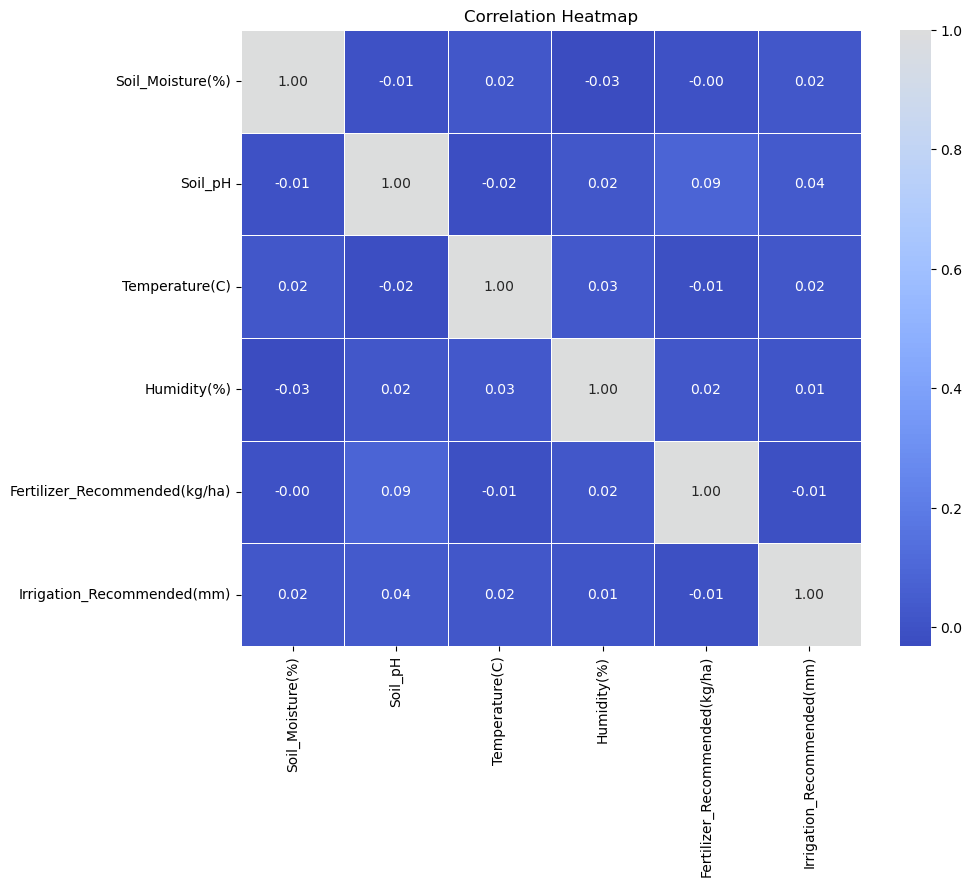

In [80]:
# Analysis
# Correlation Analysis
# calculate correlation matrix
corr_matrix = df[['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\DXB GADGETS\AppData\Local\Temp\ipykernel_17704\1921480339.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moisture_irrigation = df.groupby('Moisture_Level')['Irrigation_Recommended(mm)'].mean()
C:\Users\DXB GADGETS\AppData\Local\Temp\ipykernel_17704\1921480339.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pH_fertilizer = df.groupby('pH_Level')['Fertilizer_Recommended(kg/ha)'].mean()


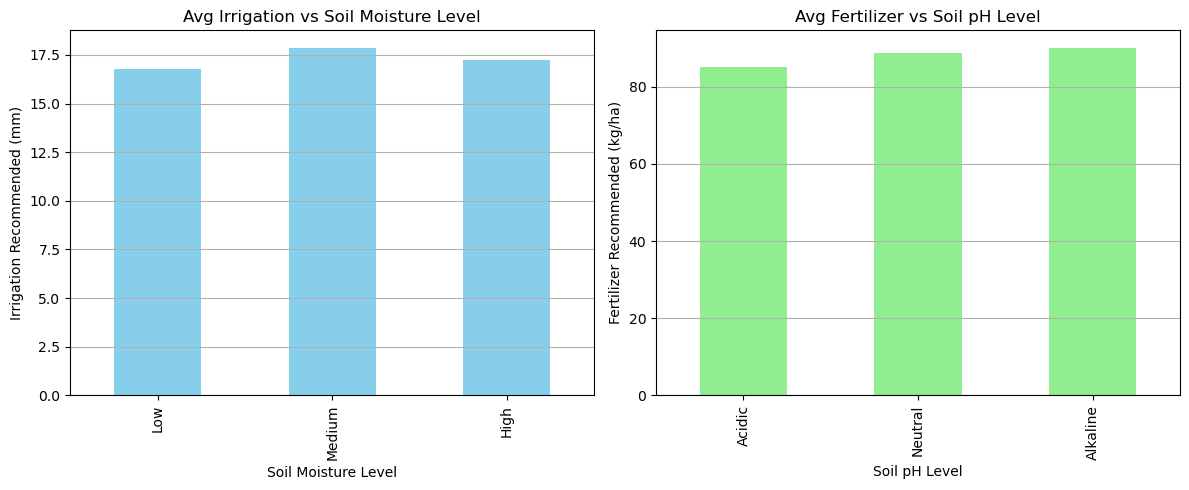

In [81]:
# Categorize Soil Moisture into bins (Low, Medium, High)
df['Moisture_Level'] = pd.cut(df['Soil_Moisture(%)'], 
                               bins=[0, 30, 60, 100], 
                               labels=['Low', 'Medium', 'High'])

# Categorize Soil pH into types (Acidic, Neutral, Alkaline)
df['pH_Level'] = pd.cut(df['Soil_pH'], 
                        bins=[0, 6.0, 7.5, 14], 
                        labels=['Acidic', 'Neutral', 'Alkaline'])

# Group-wise average recommendations
moisture_irrigation = df.groupby('Moisture_Level')['Irrigation_Recommended(mm)'].mean()
pH_fertilizer = df.groupby('pH_Level')['Fertilizer_Recommended(kg/ha)'].mean()

# Plotting
plt.figure(figsize=(12, 5))

# Plot 1: Soil Moisture vs Irrigation Recommendation
plt.subplot(1, 2, 1)
moisture_irrigation.plot(kind='bar', color='skyblue')
plt.title('Avg Irrigation vs Soil Moisture Level')
plt.ylabel('Irrigation Recommended (mm)')
plt.xlabel('Soil Moisture Level')
plt.grid(axis='y')

# Plot 2: Soil pH vs Fertilizer Recommendation
plt.subplot(1, 2, 2)
pH_fertilizer.plot(kind='bar', color='lightgreen')
plt.title('Avg Fertilizer vs Soil pH Level')
plt.ylabel('Fertilizer Recommended (kg/ha)')
plt.xlabel('Soil pH Level')
plt.grid(axis='y')

plt.tight_layout()
plt.show()